In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [3]:
boston = load_boston()

e:\projects\real_esate_price_prediction\bostonhousepricing\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
dataset['PRICE'] = boston.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

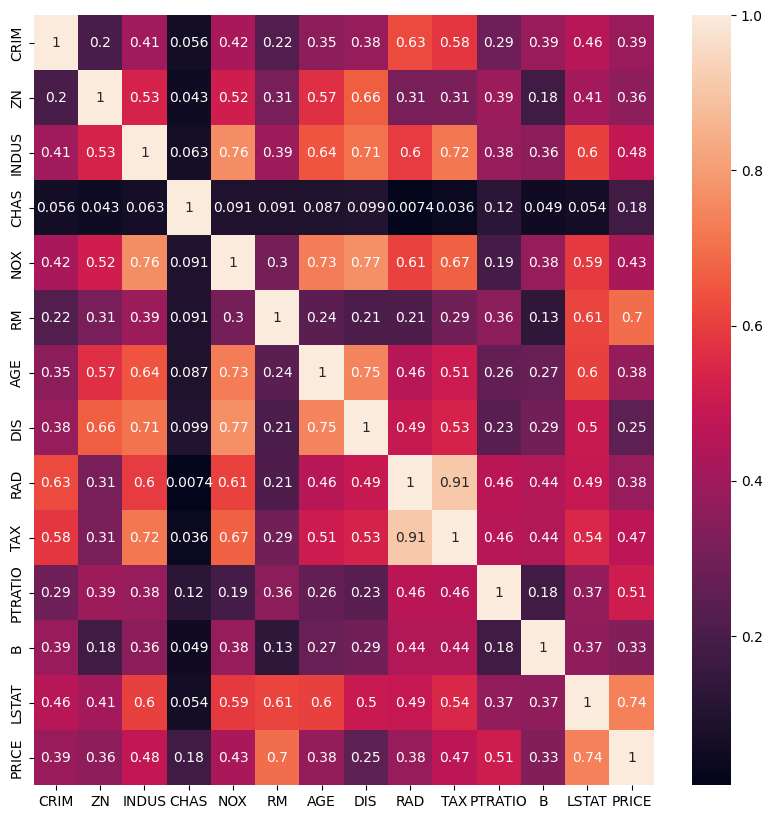

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr().abs(), annot=True)

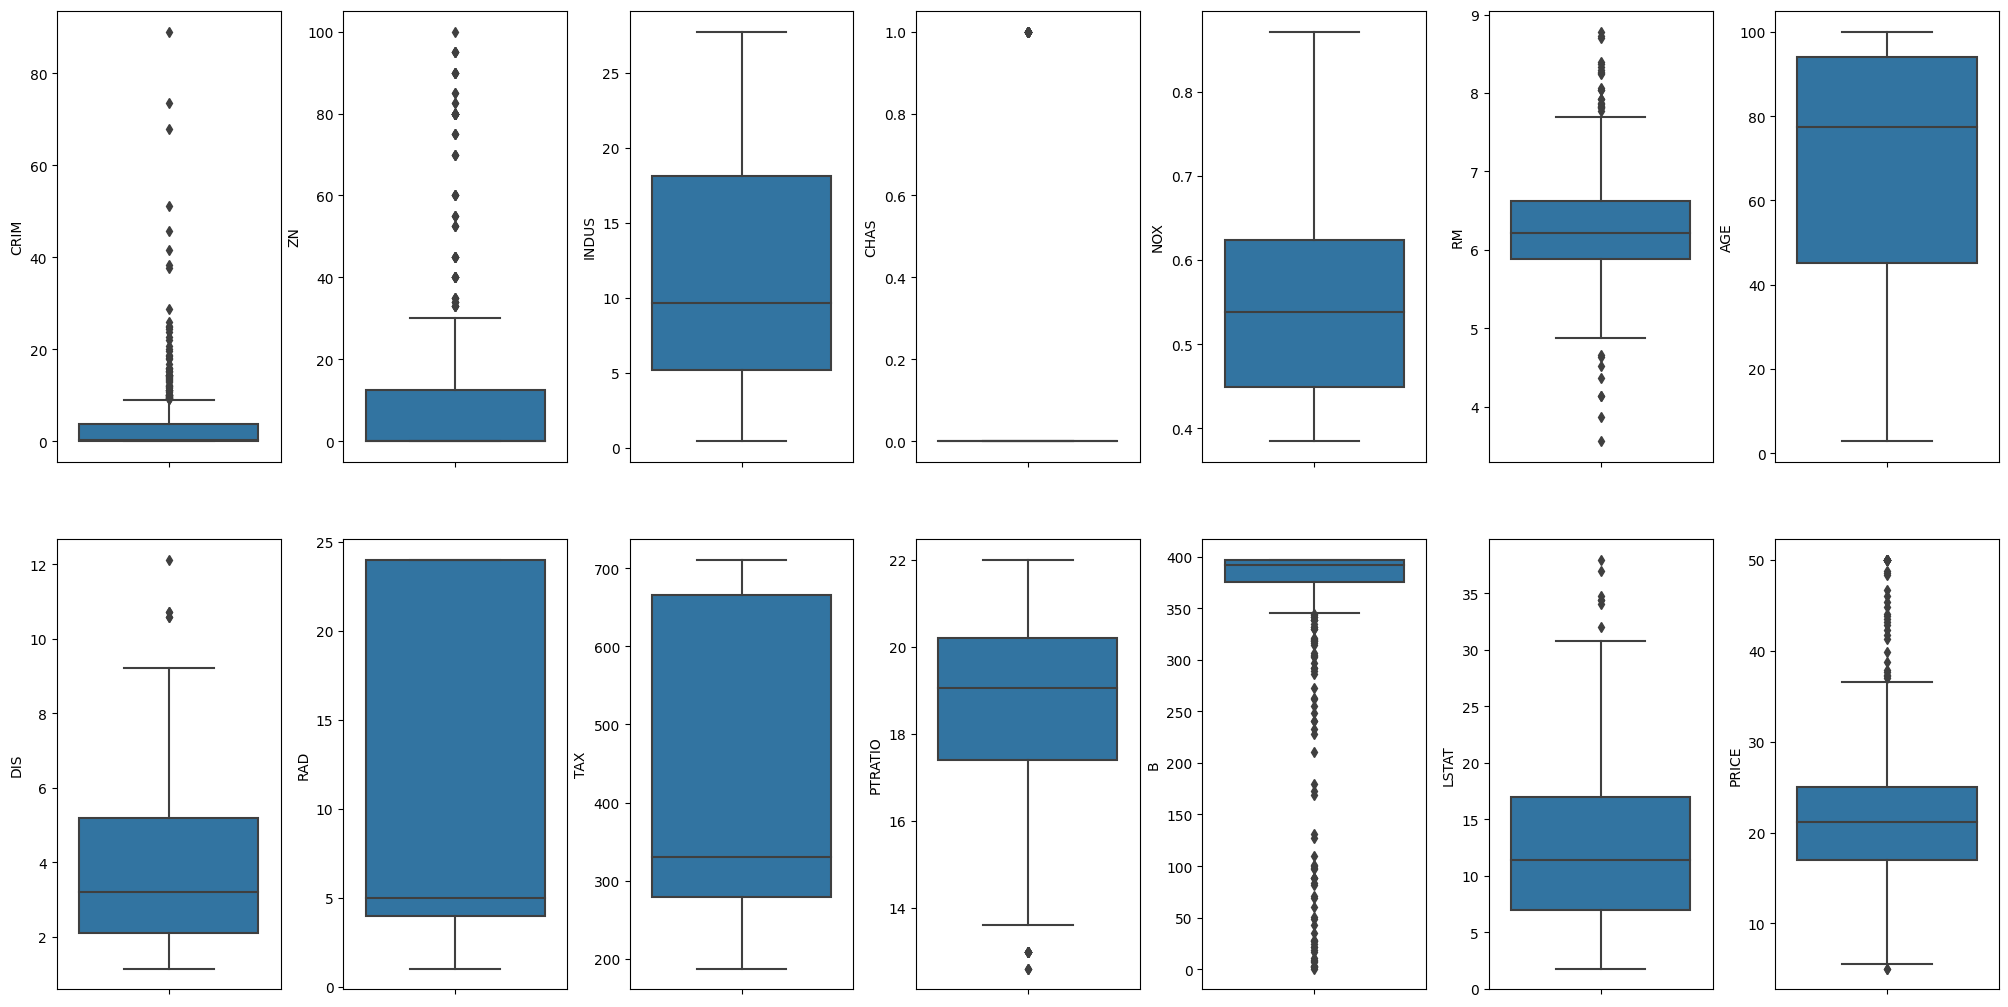

In [14]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axes = axes.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axes[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [15]:
print('Outliers : ')
for k, v in dataset.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    v_col = v[(v <= lower_bound) | (v >= upper_bound)]
    perc = np.shape(v_col)[0] * 100 / np.shape(dataset)[0] 
    print(k, ' = ', perc, '%')

Outliers : 
CRIM  =  13.043478260869565 %
ZN  =  13.438735177865613 %
INDUS  =  0.0 %
CHAS  =  100.0 %
NOX  =  0.0 %
RM  =  5.928853754940712 %
AGE  =  0.0 %
DIS  =  0.9881422924901185 %
RAD  =  0.0 %
TAX  =  0.0 %
PTRATIO  =  2.964426877470356 %
B  =  15.217391304347826 %
LSTAT  =  1.383399209486166 %
PRICE  =  7.905138339920948 %


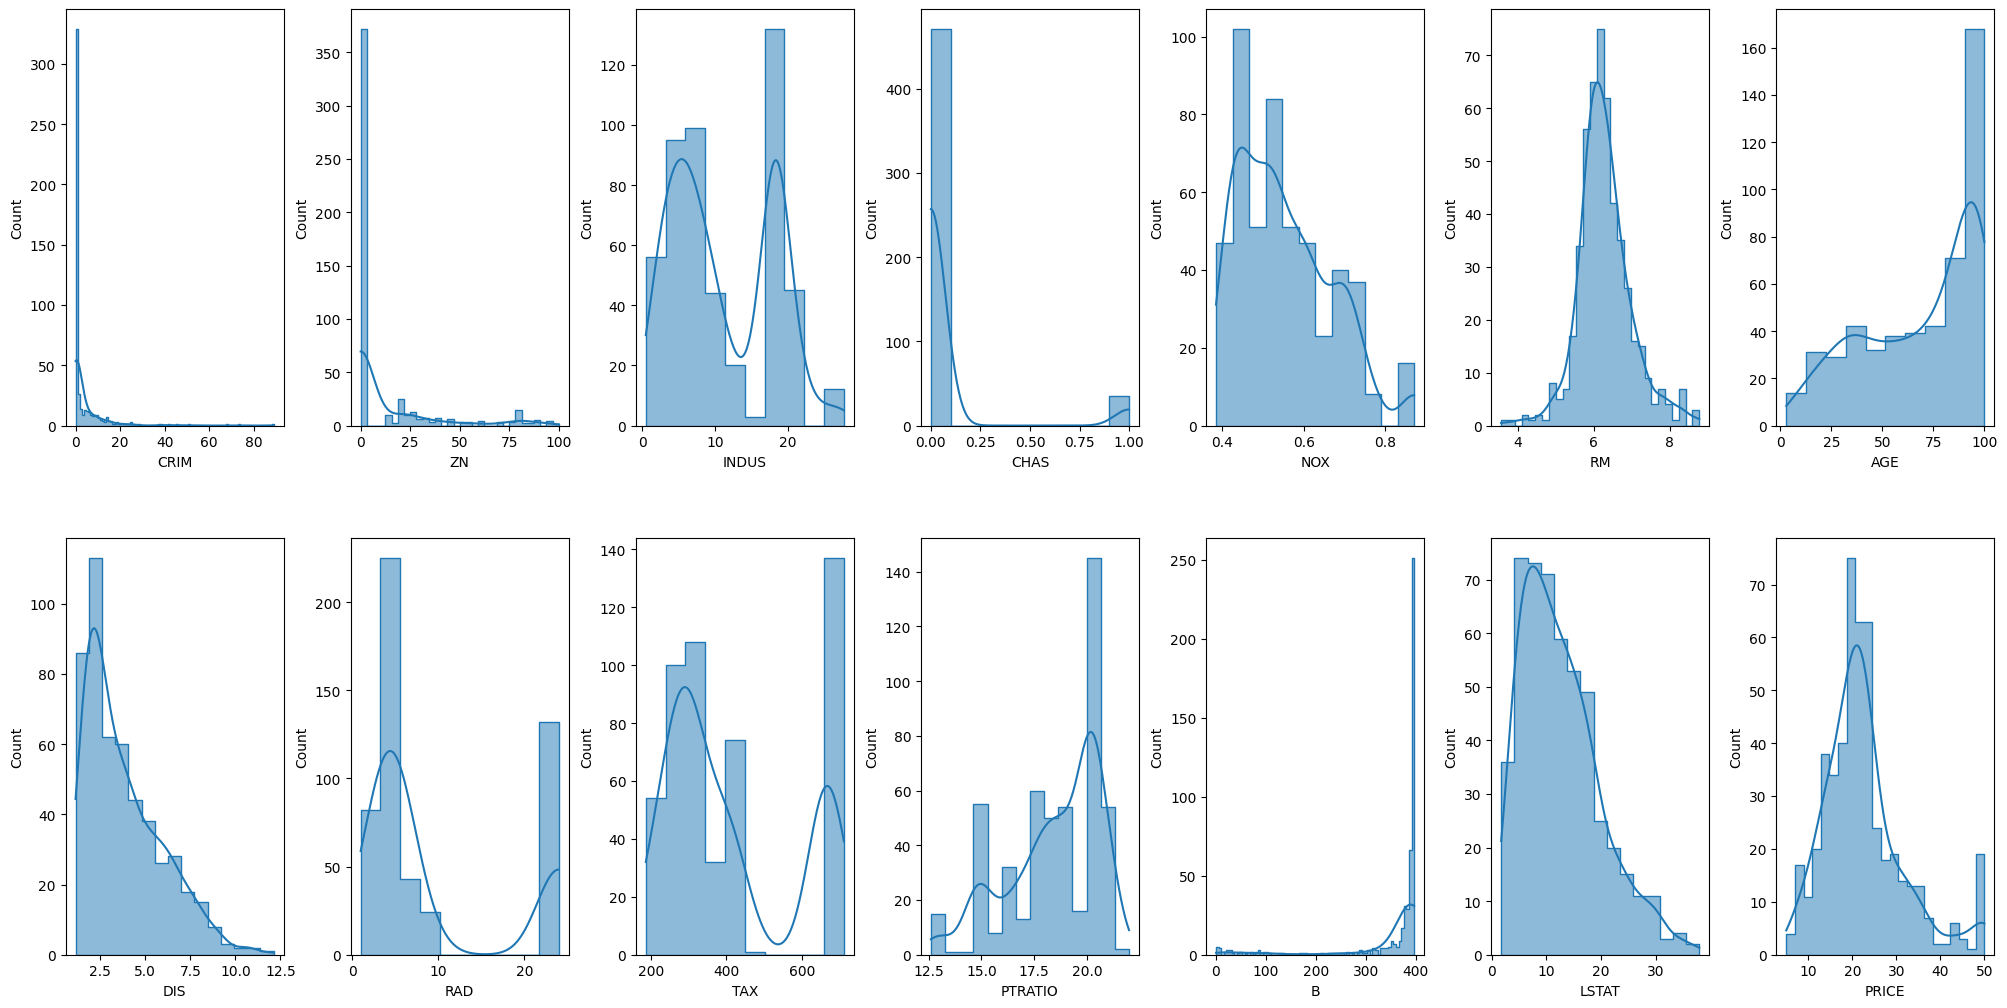

In [16]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axes = axes.flatten()
for k,v in dataset.items():
    sns.histplot(v, ax=axes[index], element='step', kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

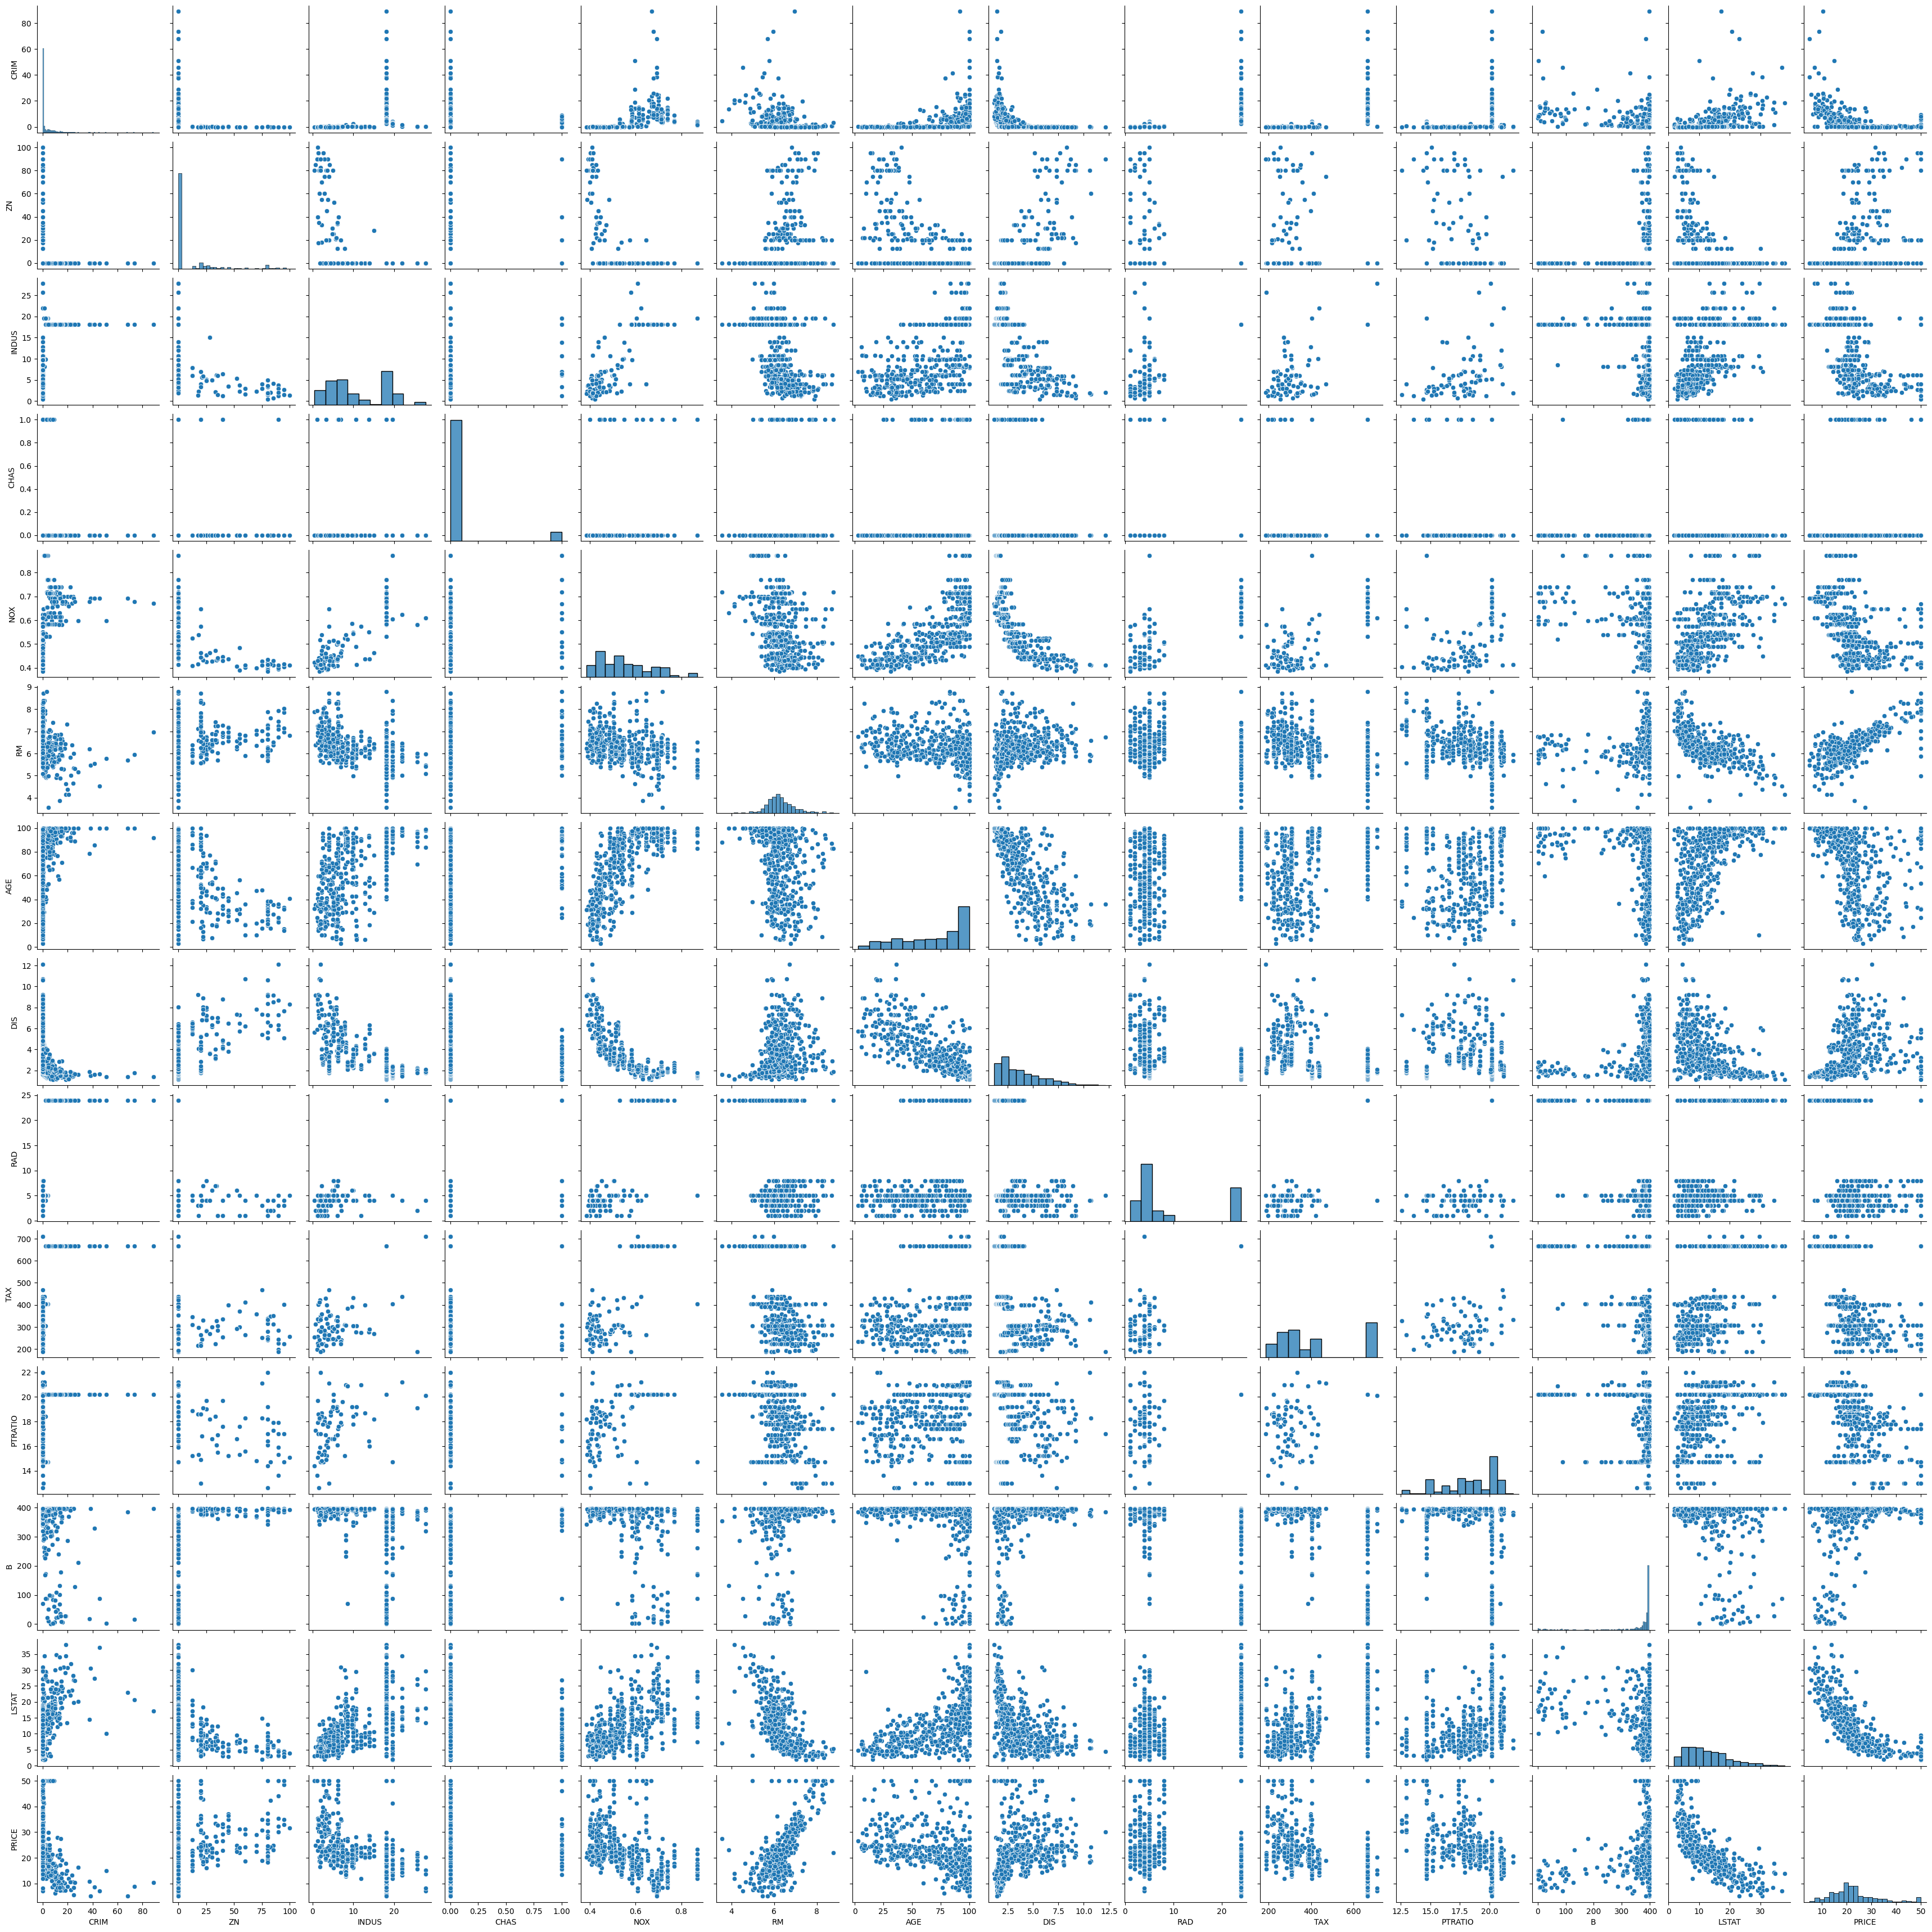

In [17]:
sns.pairplot(data=dataset)

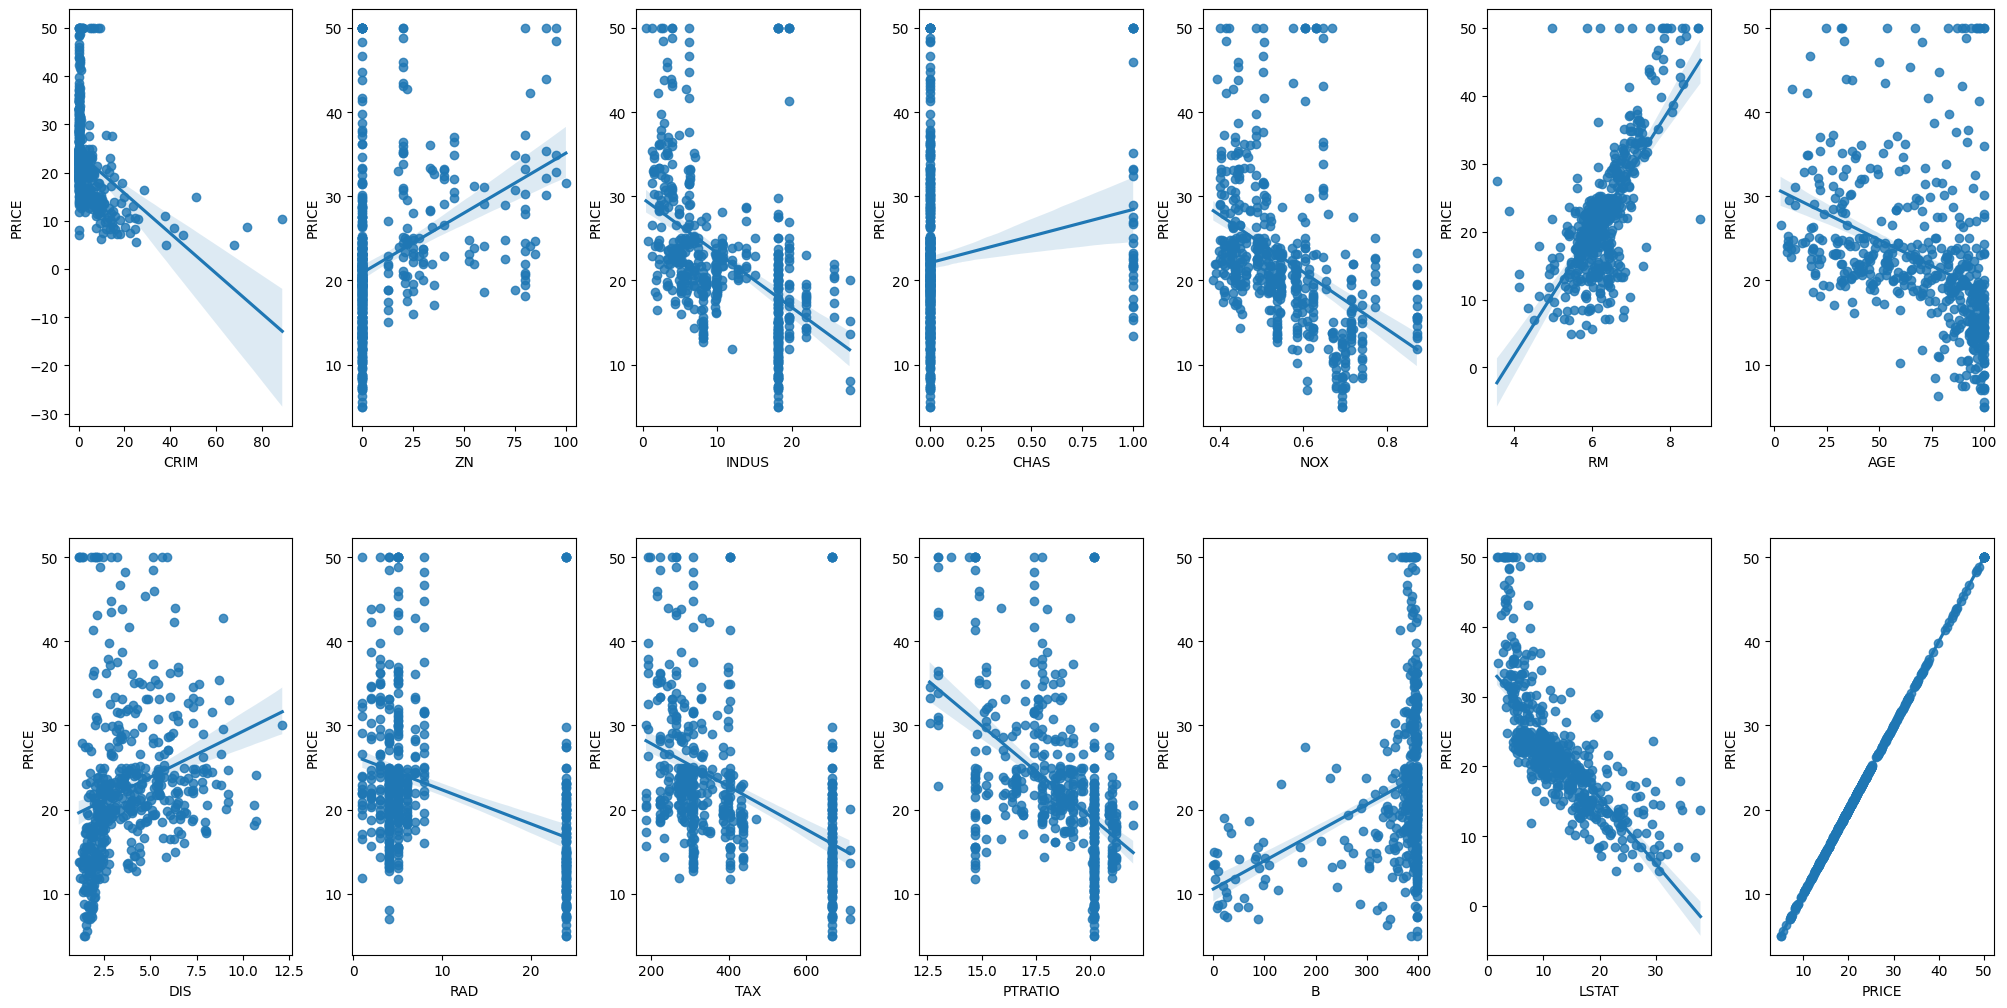

In [18]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axes = axes.flatten()
for i in dataset.columns:
    sns.regplot(data=dataset, x=i, y='PRICE', ax=axes[index] )
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [19]:
X = dataset.drop(['PRICE'], axis = 1)
y = dataset['PRICE']
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print(X_train, y_train)
print(X_test, y_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
5     0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622   3.0  222.0   
116   0.13158   0.0  10.01   0.0  0.547  6.176  72.5  2.7301   6.0  432.0   
45    0.17142   0.0   6.91   0.0  0.448  5.682  33.8  5.1004   3.0  233.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935  29.3  4.4986   4.0  307.0   
468  15.57570   0.0  18.10   0.0  0.580  5.926  71.0  2.9084  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
106   0.17120   0.0   8.56   0.0  0.520  5.836  91.9  2.2110   5.0  384.0   
270   0.29916  20.0   6.96   0.0  0.464  5.856  42.1  4.4290   3.0  223.0   
348   0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440   4.0  280.0   
435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
102   0.22876   0.0   8.56   0.0  0.520  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  
5       18.7  394.12   5.21  
116     17.8  3

In [21]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-0.41425879 -0.50512499 -1.29214218 ...  0.18727079  0.39651419
  -1.01531611]
 [-0.40200818 -0.50512499 -0.16208345 ... -0.21208981  0.3870674
  -0.05366252]
 [-0.39721053 -0.50512499 -0.60948856 ... -0.16771641  0.42854113
  -0.31132373]
 ...
 [-0.41604586  3.03838247 -1.3166773  ... -0.56707702  0.35987906
  -0.90549329]
 [ 0.92611293 -0.50512499  1.00549958 ...  0.8528718  -2.87841346
   1.52750437]
 [-0.39030549 -0.50512499 -0.37135358 ...  1.16348561 -3.32828832
  -0.25218837]]
[[-0.406801   -0.50512499 -1.02225586 ... -0.74457062  0.41241246
  -0.47605794]
 [-0.41105674  1.26662874 -0.68165068 ... -0.30083661  0.42854113
  -1.25185755]
 [-0.4051199  -0.50512499  2.39678516 ...  0.8084984   0.35031705
   0.79535229]
 ...
 [-0.35439903 -0.50512499 -0.71195877 ... -0.38958342  0.25688594
  -1.09697922]
 [ 0.25423453 -0.50512499  1.00549958 ...  0.8528718  -2.98970133
   0.53487511]
 [ 0.77732457 -0.50512499  1.00549958 ...  0.8528718   0.33199949
   0.56585078]]


In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Co-efficients = ", lm.coef_)
print("Intercept = ", lm.intercept_)

Co-efficients =  [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
Intercept =  23.01581920903955


In [23]:
y_pred = lm.predict(X_train)

<AxesSubplot:xlabel='PRICE'>

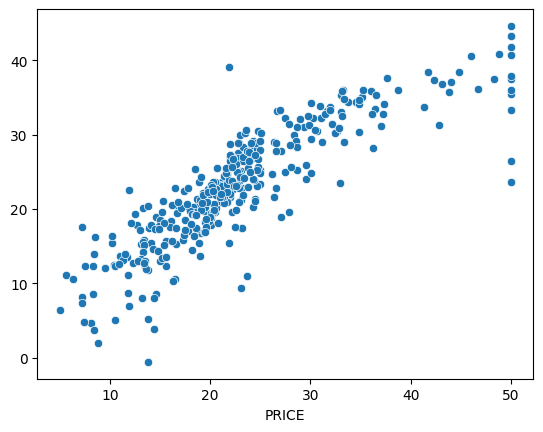

In [24]:
sns.scatterplot(x=y_train, y=y_pred)

<AxesSubplot:ylabel='PRICE'>

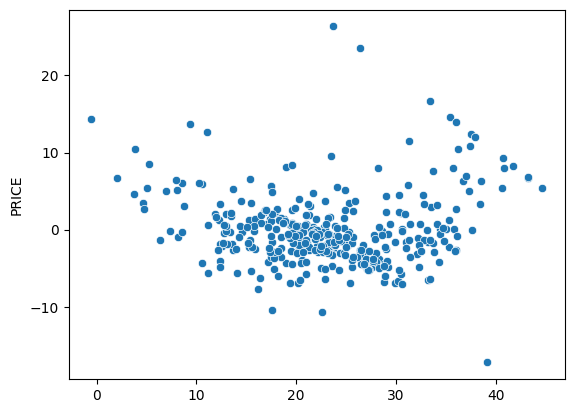

In [25]:
sns.scatterplot(x=y_pred, y=y_train-y_pred)

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

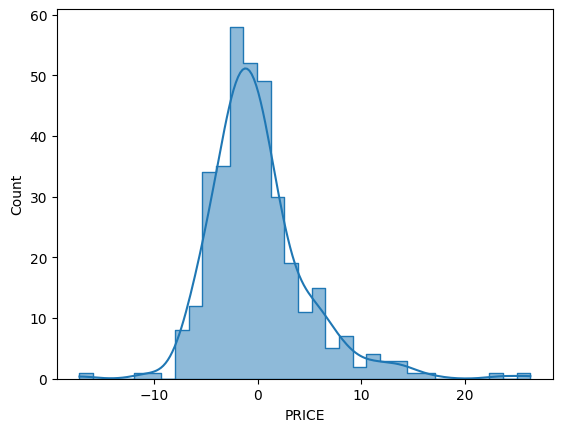

In [26]:
sns.histplot(y_train-y_pred, element='step', kde=True)

In [27]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7434997532004697
Adjusted R^2: 0.7336923908228405
MAE: 3.3568267821682065
MSE: 22.545481487421423
RMSE: 4.748208239685937


In [28]:
y_test_pred = lm.predict(X_test)

<AxesSubplot:xlabel='PRICE'>

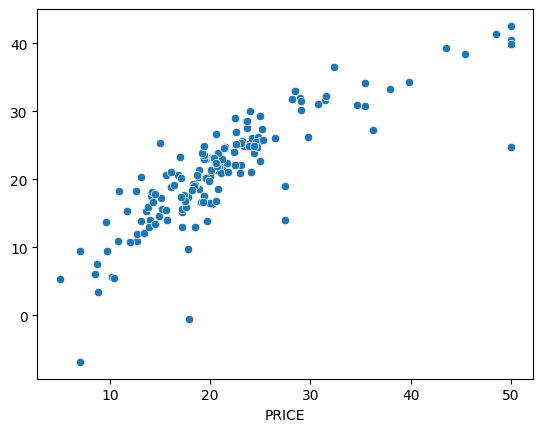

In [29]:
sns.scatterplot(x=y_test, y=y_test_pred)

<AxesSubplot:ylabel='PRICE'>

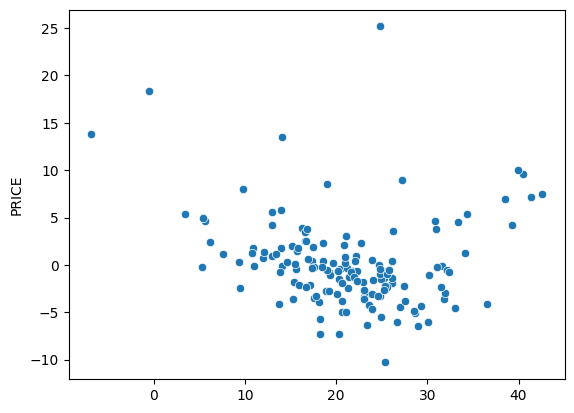

In [30]:
sns.scatterplot(x=y_test_pred, y=y_test - y_test_pred)

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

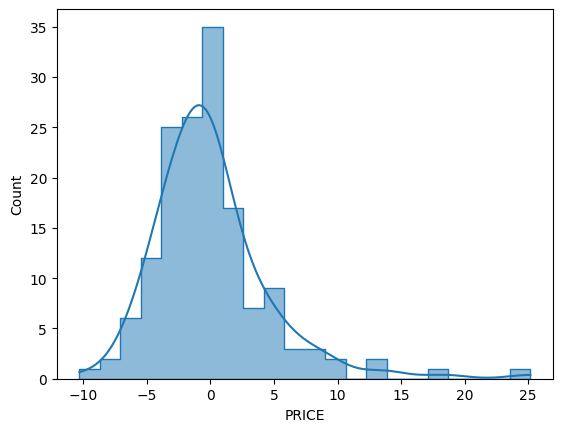

In [31]:
sns.histplot(y_test - y_test_pred, element='step', kde=True)

In [32]:
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7112260057484933
Adjusted R^2: 0.6840226584639311
MAE: 3.162709871457405
MSE: 21.517444231177205
RMSE: 4.6386899261728205


In [33]:
new_data = boston.data[0].reshape(1, -1)
print(new_data)
new_data = scaler.transform(new_data)
print(new_data)

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
[[-0.41709233  0.29216419 -1.27338003 -0.28154625 -0.16513629  0.34715902
  -0.13030059  0.15267164 -0.97798895 -0.66777595 -1.32142483  0.42854113
  -1.04769976]]


e:\projects\real_esate_price_prediction\bostonhousepricing\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
lm.predict(new_data)

array([30.08649576])

In [35]:
pickle.dump(lm, open('reg_model.pkl', 'wb'))

In [36]:
pickled_model = pickle.load(open('reg_model.pkl', 'rb'))
pickled_model.predict(new_data)

array([30.08649576])

In [37]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))